<a href="https://colab.research.google.com/github/ranmaru08/REDES-NEURONALES-PARA-CLASIFICACION/blob/main/REDES_NEURONALES_PARA_CLASIFICACI%C3%93N_EN_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #
import matplotlib.pyplot as plt # graficas
import numpy as np # areglos , salidad , datos de validacion
from sklearn.model_selection import train_test_split # redes de clasificacion multicapa otro keras
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier # funcion red neurinal multicapa de clasificacion
from sklearn.metrics import accuracy_score# media de ectaritiud
from sklearn.metrics import classification_report# medida de escalamiento
from sklearn.model_selection import GridSearchCV
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_fetal2020.csv to asriosgu_fetal2020.csv


In [2]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1') # Separacion por comas y ejecutar el archivo
tabla.head(4)

<ipython-input-2-19a6dafdbd87>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1') # Separacion por comas y ejecutar el archivo


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


**Punto #1**

con la función de train_test_split de sklearn se establece el conjunto de datos de entrenamiento y de validación tomando como tamaño para el entrenamiento del 70% de los datos. Las variables explicativas corresponden a: "SEXO", "P_PMAN_IRIS" (principal causa de muerte) y "T_GES" (tiempo de gestación). La variable respuesta corresponde a: "PESO_NAC".

In [3]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)
#poner degun la clasificacion del Dane para valores deconocidos


<ipython-input-3-bf6af66c2c86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,nan,9,1
11,3,0.0,1,1
11,1,0.0,1,2
11,3,nan,1,1


In [4]:
df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = "6"
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6,9,1
11,3,0.0,1,1


In [5]:
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)
df.loc[(df.P_PMAN_IRIS == "6"), 'P_PMAN_IRIS'] = "6"
df.head(2)

<ipython-input-5-a0b73d84310a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6.0,9,1
11,3,0.0,1,1


In [6]:
df["P_PMAN_IRIS"].value_counts()
df["PESO_NAC"].value_counts()
df["T_GES"].value_counts()

1    23723
9     3127
3     2859
2     2646
4      949
5       23
Name: T_GES, dtype: int64

In [7]:
x = df.drop("PESO_NAC", axis=1) # de dumie final se quieta LA VARIABLE RESPUESTA .. EN LA TAREA ES PESO
y = df["PESO_NAC"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3) # porcentaje de validacion el restante es de entrenamiento
trainX

,SEXO,P_PMAN_IRIS,T_GES
COD_DPTO,,,
25,3,6.0,1
70,3,0.0,9
5,3,6.0,1
5,3,6.0,1
50,3,6.0,1
...,...,...,...
11,3,6.0,1
23,3,6.0,1
50,3,6.0,1


In [8]:
df["PESO_NAC"] = df.PESO_NAC.astype(str)
df.loc[(df.PESO_NAC == "1"), 'PESO_NAC'] = "< 1 Kg"
df.loc[(df.PESO_NAC == "2"), 'PESO_NAC'] = "1-1.5 Kg"
df.loc[(df.PESO_NAC == "3"), 'PESO_NAC'] = "1.5-2 Kg"
df.loc[(df.PESO_NAC == "4"), 'PESO_NAC'] = "2-2.3 Kg"
df.loc[(df.PESO_NAC == "5"), 'PESO_NAC'] = "2-2.5 Kg"
df.loc[(df.PESO_NAC == "6"), 'PESO_NAC'] = "3-3.4 Kg"
df.loc[(df.PESO_NAC == "7"), 'PESO_NAC'] = "3-3.5 Kg"
df.loc[(df.PESO_NAC == "8"), 'PESO_NAC'] = ">4 Kg"
df.loc[(df.PESO_NAC == "9"), 'PESO_NAC'] = "Deconocido Kg"
print(df)

          SEXO P_PMAN_IRIS       PESO_NAC  T_GES
COD_DPTO                                        
70           3         6.0  Deconocido Kg      1
11           3         0.0         < 1 Kg      1
11           1         0.0         < 1 Kg      2
11           3         6.0         < 1 Kg      1
11           2         6.0       1.5-2 Kg      3
...        ...         ...            ...    ...
41           3         6.0         < 1 Kg      1
11           3         6.0  Deconocido Kg      1
11           3         0.0  Deconocido Kg      1
76           3         6.0         < 1 Kg      1
11           3         0.0         < 1 Kg      1

[33327 rows x 4 columns]


<ipython-input-8-a195d5e16cc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PESO_NAC"] = df.PESO_NAC.astype(str)


In [9]:
# from sklearn.impute import SimpleImputer
# simple = SimpleImputer(strategy='most_frequent')
# df = simple.fit_transform(df)
df = pd.DataFrame(df, columns = ["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"])
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6.0,Deconocido Kg,1
11,3,0.0,< 1 Kg,1
11,1,0.0,< 1 Kg,2
11,3,6.0,< 1 Kg,1


In [10]:
dummi1 = pd.get_dummies(x['SEXO'], dtype=float)
dummi1.columns = ['Masc', 'Fem', 'Desc']
dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)
dummi2.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido"]
dummi3 = pd.get_dummies(x['T_GES'], dtype=float)
dummi3.columns = ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]
dummi = pd.concat([dummi1, dummi2, dummi3, y], axis=1)
dummi.head(4)

<ipython-input-10-8a7cd2abb3a3>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)


,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,9
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1


**Punto # 2**
 Usando la función MLPClassifier entrene una red neuronal utilizando los
siguientes argumentos:

1. sample(3:24, size = 1) (en lenguaje R) de capas ocultas, cada una con igual número de nodos dado por sample(3:24, size = 1) (en lenguaje R).

2. Función de activación dada por la función RELU

3. Número máximo de iteraciones igual a 500

4. Método de solución dado por 'adam'















In [11]:
x1 = dummi.drop("PESO_NAC", axis=1)
x1
y1 = dummi["PESO_NAC"]
train1, test1, train2, test2 = train_test_split(x1, y1, test_size = 0.3)
train1

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
sc=StandardScaler()
# scaler = sc.fit(trainX)
# trainX_scaled = scaler.transform(trainX)
# testX_scaled = scaler.transform(testX)

In [13]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20,20,20,20,20),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')

In [14]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20,20,20,20,20),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX, trainY)

MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20, 20, 20, 20, 20),
              max_iter=500)

In [15]:
y_pred = mlp_clf.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Exactitud: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.75
Exactitud: 0.75


**Análisis de codigo**

La precisión, que refleja cuántas predicciones acertadas realiza el modelo en relación con todas las predicciones, se busca típicamente alrededor del 97% o más para una calidad óptima. Considerando este estándar, el modelo en cuestión no se muestra tan efectivo, ya que no alcanza el umbral del 97%.

**Punto # 3**
Haga la matriz de confusión y la gráfica de la curva de pérdida. De acuerdo
con estas ¿Hay un buen ajuste del modelo a los datos? Para ello determine la también la
exactitud.

In [16]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)

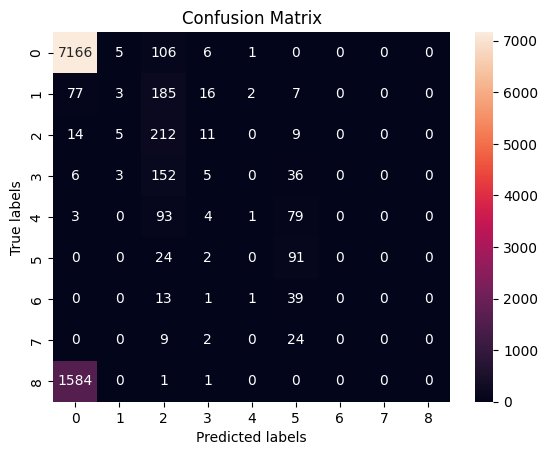

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

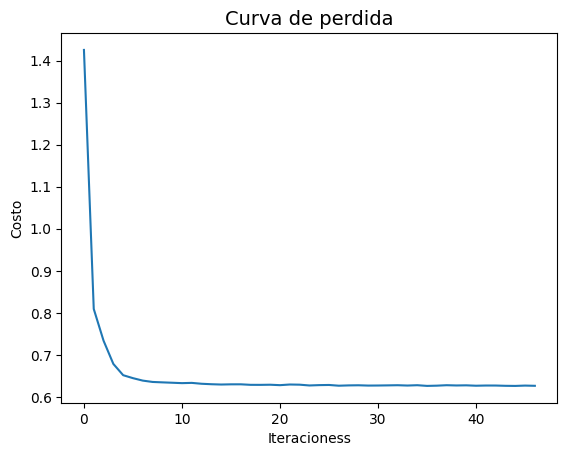

In [18]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

**INTERPRETACION**

La progresión inicial de la curva revela un descenso rápido, evidenciando un aprendizaje ágil y una adaptación efectiva del modelo. A medida que avanza, se observa una estabilización, indicando una desaceleración en el ritmo de mejora con cada iteración subsiguiente. Esta fase sugiere que el modelo ha alcanzado un nivel de aprendizaje óptimo con los datos actuales, limitando su capacidad para seguir absorbiendo nueva información.


**Punto # 4**

 Determine las condiciones de las variables explicativas bajo las cuáles un
bebé presentó bajo peso al momento de su fallecimiento. Para ello haga la predicción del
modelo cambiando las condiciones de la principal causa de muerte, el sexo y el tiempo de
gestación.



In [19]:
train1.head(2)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
no_obs = np.array([[1, 1, 0]])
mlp_clf.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [21]:
no_obs1 = np.array([[1, 1, 1]])
mlp_clf.predict(no_obs1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [22]:
no_obs2 = np.array([[2, 1, 0]])
mlp_clf.predict(no_obs2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [23]:
df.PESO_NAC.unique() # Mostrar los valores únicos de la variable objetivo 'PESO_NAC' en el conjunto de datos original

array(['Deconocido Kg', '< 1 Kg', '1.5-2 Kg', '3-3.5 Kg', '1-1.5 Kg',
       '2-2.5 Kg', '2-2.3 Kg', '3-3.4 Kg', '>4 Kg'], dtype=object)

**INTERPRETACION**

El modelo de clasificación (MPL) indica que, bajo ciertas condiciones de variables explicativas, existe una alta probabilidad de que un bebé tenga un peso al nacer inferior a 1 kg. Esto sugiere que factores como la causa de muerte, el sexo y el tiempo de gestación están estrechamente vinculados a la posibilidad de que un recién nacido tenga un peso bajo al nacer




**Punto #5**

Implemente un modelo con el doble de capas ocultas del procedimiento 2,
utilizando los mismos argumentos dados en tal procedimiento ¿Qué modelo tiene mayor *exactitud*? Haga la gráfica de la curva de pérdida e interprétela.

In [24]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20),
                        max_iter = 500, activation = 'relu',
                        solver = 'adam')
mlp_clf2.fit(trainX, trainY) # capas ocultas ...

MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
                                  20, 20, 20, 20, 20, 20, 20),
              max_iter=500)

In [25]:
y_pred2 =  pd.DataFrame(mlp_clf2.predict(testX))
y_pred2.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(testY, y_pred2)))

Exactitud: 0.75


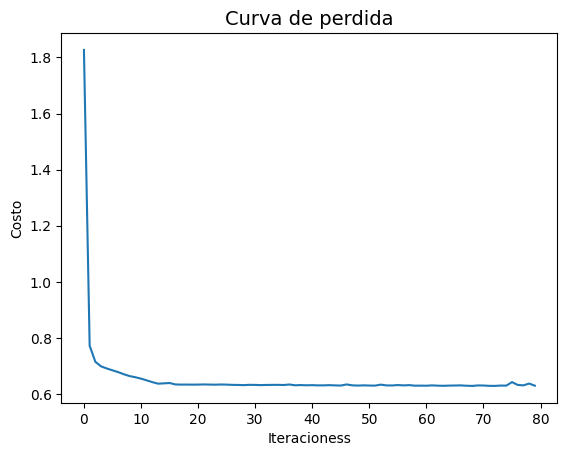

In [28]:
plt.plot(mlp_clf2.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()


**interpretacion**

La tendencia de la curva de pérdida indica fluctuaciones y picos notables, especialmente después de la iteración 25, lo que sugiere cierta inestabilidad en el proceso de aprendizaje. Estos picos revelan inconsistencias en el modelo, señalando que el rendimiento no es óptimo y hay dificultades para estabilizar el aprendizaje.